In [333]:
import pandas as pd
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [325]:
background_color = '#f7f8f3'
sec_color = '#BBC4C2'
team_color = '#C8102E'
text_color = '#464033'
team_name = "Liverpool"
season = "2024-25"

font_path = "C:/Users/jerry/Documents/Personal/09 Repositories/fonts/Roboto/Roboto-Black.ttf"
font_props = font_manager.FontProperties(fname=font_path)

In [331]:
url = "https://fbref.com/en/squads/822bd0ba/2024-2025/c9/Liverpool-Stats-Premier-League"

# Fetch squad data
df = pd.read_html(url, attrs={'id': 'stats_standard_9'})[0]
df.columns = df.columns.droplevel(0)
df = df.drop(df.tail(2).index)  # Drop totals
df = df[df['Min'].notna()]

# Fetch fixtures data and calculate max minutes
df_fixtures = pd.read_html(url, attrs={'id': 'matchlogs_for'})[0]
df_fixtures = df_fixtures[df_fixtures['Result'].notna()]
max_mins = df_fixtures.shape[0] * 90

# Clean and process squad data
df['Age'] = df['Age'].str.split('-').str[0]
df["Percent MP"] = round((df["Min"] / max_mins) * 100, 1)

# Format player names
def format_name(name):
    if ' ' in name:
        first, rest = name.split(' ', 1)
        return f"{first[0].upper()}. {rest}"
    return name

df['Player'] = df['Player'].apply(format_name)

# Sort and finalize data
df = df.sort_values(by='Age')
df['Age'] = pd.to_numeric(df['Age'])

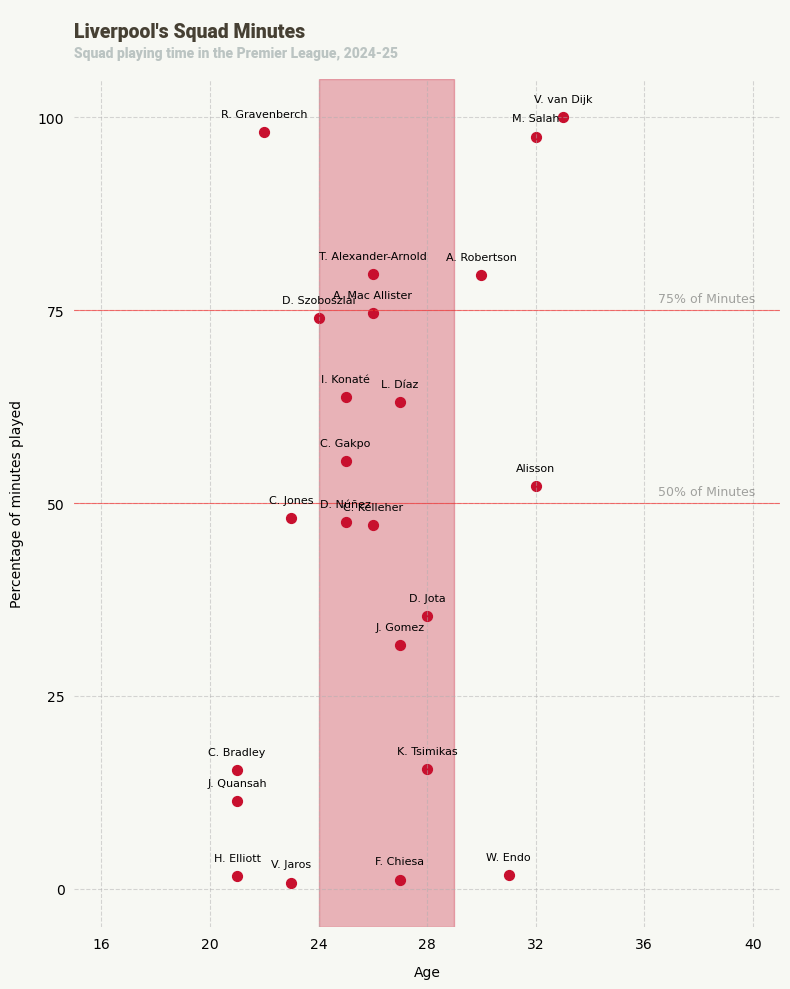

In [335]:
# Plotting
fig = plt.figure(figsize=(8, 10), facecolor=background_color)
gs = GridSpec(2, 1, figure=fig, height_ratios=[0.25, 4])

# Title section
ax_title = fig.add_subplot(gs[0, 0])
ax_title.text(x=0, y=0.75,
              s=f"{team_name}'s Squad Minutes",
              fontsize=14, color=text_color, fontproperties=font_props,
              ha='left', va='top')

ax_title.text(x=0, y=0.3,
              s=f"Squad playing time in the Premier League, {season}",
              fontsize=10, color=sec_color, fontproperties=font_props,
              ha='left', va='top')

ax_title.set_axis_off()

# Chart section
ax_chart = fig.add_subplot(gs[1, 0])
ax_chart.set_facecolor(background_color)

# Highlight peak age range
ax_chart.axvspan(24, 29, color=team_color, alpha=0.3)

# Add horizontal lines
ax_chart.axhline(50, color='red', alpha=0.5, linestyle='-', linewidth=0.8)
ax_chart.axhline(75, color='red', alpha=0.5, linestyle='-', linewidth=0.8)

# Add text annotations for lines
ax_chart.text(36.5, 51, '50% of Minutes', fontsize=9, alpha=0.35)
ax_chart.text(36.5, 76, '75% of Minutes', fontsize=9, alpha=0.35)

# Scatter plot
ax_chart.scatter(df['Age'], df['Percent MP'], s=50, color=team_color)

# Annotate player names
for i, row in df.iterrows():
    ax_chart.text(row['Age'], row['Percent MP'] + 3, row['Player'], fontsize=8, ha='center', va='top')

# Add labels, ticks, and grid
ax_chart.set_xlabel('Age', fontsize=10, labelpad=10)
ax_chart.set_ylabel('Percentage of minutes played', fontsize=10, labelpad=10)
ax_chart.set_xlim(15, 41)
ax_chart.set_ylim(-5, 105)
ax_chart.set_xticks(range(16, 44, 4))
ax_chart.set_yticks(range(0, 125, 25))
ax_chart.grid(visible=True, linestyle='--', alpha=0.5)
ax_chart.tick_params(left=False, bottom=False)

# Remove spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax_chart.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()